In [144]:
from __future__ import print_function
import requests as rq
import time, os
import matplotlib.image as pli
import matplotlib.pyplot as plt
ip=!ifconfig eth0 | grep -Po 'inet \K([\d\.]+)'
ip=ip[0]
from IPython.core.display import HTML
#HTML('<img src="http://%s:3000/video/0">'%ip)

In [157]:
#HTML('<img width="320" src="http://%s:3000/move/left/20/100?%d">'%(ip,int(time.time()*10)))

In [154]:
def snap(i,  pref):
    url = "http://%s:3000/move/left/20/100?%d"%(ip,int(time.time()*10))
    r = rq.get(url)
    file = "%s-%d.jpg"%(pref,i)
    content = r.content
    with open(file, "wb") as f:
        f.write(content)
    return file
#snap(0, "tmp/snap")
for i in range(25): snap(i, "tmp/test")

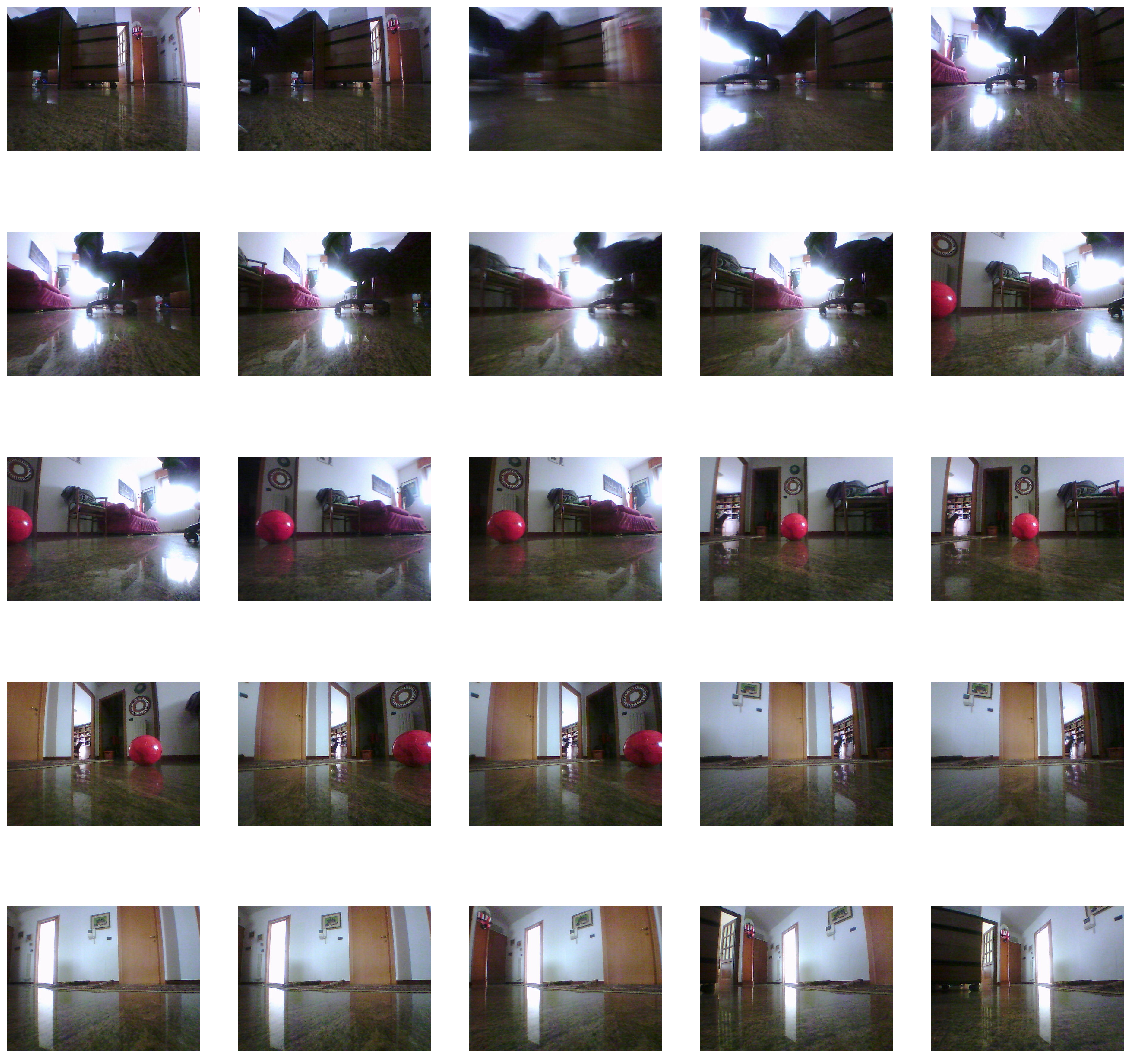

In [156]:
pref = "tmp/snap"
try: os.mkdir("tmp")
except: pass

nr = 5
nc = 5

fig = plt.gcf()
fig.set_size_inches(nc*4, nr*4)

for i in range(0, nr*nc):
    file = snap(i, "tmp/snap")
    #print(file)
    img = pli.imread(file)
    plt.subplot(nr,nc,i+1).axis('Off')
    plt.imshow(img)
    